In [1]:
import numpy as np
import matplotlib.pylab as plt

Empezaremos leyendo los datos. Concretamente seleccionaremos la primera y tercera columna del dataset. La primera columna corresponde con un código numérico y el nombre del municipio separados por un espacio. La tercera columna se corresponde con los datos de los 5 indicadores que tenemos en cada municipio. Notemos que numpy solo trabaja con datos numéricos y la primera columna contiene datos textuales. Por tanto lo que haremos es leer estos datos como si fuesen un string, tomaremos el código del municipio (es sencillo utilizando la función **split()**) y lo transformaremos a un tipo de dato **float** para que pueda ser tratado con numpy.

In [2]:
data = np.loadtxt("../datos/datosA.csv", 
                  delimiter = ";", 
                  usecols = (0, 2), 
                  skiprows = 1, 
                  converters = {0: lambda s: float(str(s.decode(encoding = "latin1")).split(" ")[0])})

Lo primero que vamos a hacer es inspeccionar si falta algún indicador para algún municipio. Fijémonos que debería haber 5 indicadores para cada municipio. Comprobamos si es así porque si sabemos que todos los municipios tienen todos los indicadores, entonces será sencillo agrupar los datos por los diferentes indicadores.

Para logar este objetivo, usaremos la función **unique()** sobre el primer valor de todas las filas (que es el identificador de cada municipio). Añadiremos el parámetro **return_counts = True** para que nos devuelva el número de veces que se observa cada municipio. Si no falta ningún dato, entonces nos debería devolver un array con todos los valores igual a 5. Por lo que si volvemos a aplicar la función **unique()**, nos devolverá un array con un solo valor: el 5.

In [4]:
np.unique(np.unique(data[:,0], return_counts = True)[1])

array([5])

Para obtener la serie de nacidos vivos por residencia materna, primero debemos seleccionar la primera columna de los datos. Sabemos que el total nacidos vivos por residencia materna de cada municipio se corresponde con la primera entrada de cada municipio. Por tanto, como no falta ningún indicador para ningún municipio, será suficiente con seleccionar las posiciones de 5 en 5 empezando por el índice 0.

In [5]:
# Serie de nacidos vivos por residencia materna
data[:, 1][::5]

array([ 70.   ,  47.   , 178.   ,  58.   , 109.   ,   6.   ,  57.   ,
         3.   ,  62.   ,  10.   ,  50.   , 340.   ,  20.   , 100.   ,
       109.   ,  41.   , 208.   ,  35.   ,  14.   ,   5.   , 434.   ,
         3.   ,  35.   ,   1.   , 186.   ,  39.   ,  91.   ,   4.   ,
       334.   ,  16.   ,  58.   ,  24.   , 277.   , 445.   ,  13.   ,
       239.   ,  19.   , 264.   ,  33.   ,   6.   ,  22.   ,  77.   ,
         3.345,  26.   , 170.   , 130.   ,  50.   ,  13.   ,  34.   ,
       230.   ,  23.   ,  52.   , 237.   ,  61.   ,  37.   ,   8.   ,
       303.   ,  92.   ,  63.   ,  86.   ,  33.   ,  28.   ,  32.   ,
        94.   , 104.   ,  13.   ,  49.   ])

Podemos visualizar graficamente la serie gracias a la librería **Matplotlib**.

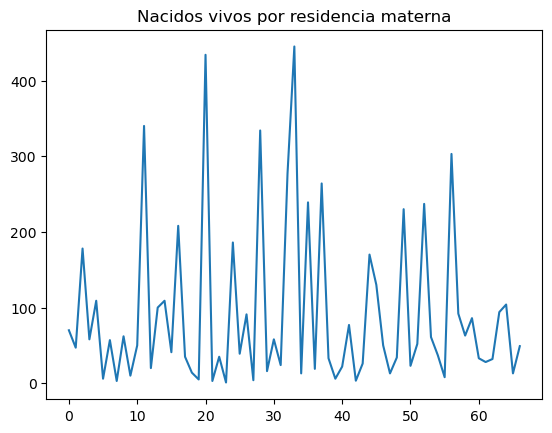

In [7]:
fig, ax = plt.subplots()
plt.title("Nacidos vivos por residencia materna")
ax.plot(data[:,1][::5])

Del gráfico vemos que hay una variación significativa de los datos. Cuando calculemos la desviación estándard tendremos una medida de dicha dispersión.

Para obtener la serie ordenada de fallecidos por lugar de residencia usaremos la función **sort()** sobre la serie de fallecidos por lugar de residencia. Para obtener dicha serie el razonamiento es análogo al que hemos comentado para obtener la serie de nacidos vivos por residencia materna. Simplemente debemos notar que el total de fallecidos por lugar de residencia de cada municipio se corresponde con la 4 entrada (índice 3) de cada municipio.

In [28]:
# Serie de fallecidos por lugar de residencia
np.sort(data[:,1][3::5])

array([  0.   ,   2.   ,   3.   ,   3.   ,   3.   ,   3.355,   4.   ,
         7.   ,   8.   ,  10.   ,  10.   ,  11.   ,  12.   ,  12.   ,
        17.   ,  23.   ,  24.   ,  25.   ,  28.   ,  28.   ,  29.   ,
        30.   ,  30.   ,  30.   ,  30.   ,  31.   ,  39.   ,  41.   ,
        42.   ,  42.   ,  43.   ,  44.   ,  45.   ,  46.   ,  49.   ,
        52.   ,  52.   ,  55.   ,  55.   ,  58.   ,  59.   ,  64.   ,
        65.   ,  65.   ,  71.   ,  85.   ,  91.   ,  94.   , 103.   ,
       108.   , 108.   , 110.   , 128.   , 131.   , 134.   , 141.   ,
       151.   , 172.   , 189.   , 200.   , 218.   , 219.   , 229.   ,
       246.   , 294.   , 315.   , 341.   ])

Podemos ver gráficamente la serie de fallecidos por lugar de residencia utilizando la librería **Matplotlib**.

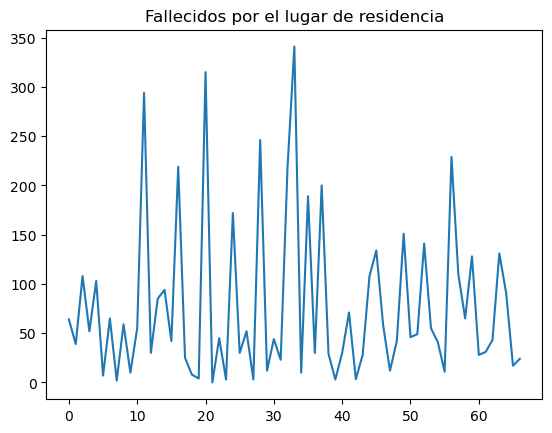

In [6]:
fig, ax = plt.subplots()
plt.title("Fallecidos por el lugar de residencia")
ax.plot(data[:,1][3::5])

También podemos observar claramente como los fallecidos por lugar de residencia varían mucho dependiendo del municipio. Cuando calculemos la desviación estándard tendremos una medida de dicha dispersión.

A continuación vamos a obtener la media de cada uno de los 5 indicadores. Para ello vamos a utilizar la función **mean()** sobre cada serie. Para obtener las series deberemos hacer slicing usando el mismo planteamiento que ya hemos comentado. 

In [36]:
# Medias de los 5 indicadores
print(f'Media de nacidos vivos por residencia materna: {np.mean(data[:,1][::5])}')
print(f'Media de muertes fetales tardías por residencia materna: {np.mean(data[:,1][1::5])}')
print(f'Media de matrimonios por el lugar en que han fijado residencia: {np.mean(data[:,1][2::5])}')
print(f'Media de fallecidos por el lugar de residencia: {np.mean(data[:,1][3::5])}')
print(f'Media de crecimiento vegetativo: {np.mean(data[:,1][4::5])}')

Media de nacidos vivos por residencia materna: 91.2439552238806
Media de muertes fetales tardías por residencia materna: 0.5970149253731343
Media de matrimonios por el lugar en que han fijado residencia: 27.56886567164179
Media de fallecidos por el lugar de residencia: 77.72171641791044
Media de crecimiento vegetativo: 13.373134328358208


Seguidamente vamos a obtener la desviación estándar de cada uno de los 5 indicadores. Para ello vamos a utilizar la función **std()** sobre cada serie. Y del mismo modo, para obtener las series, deberemos hacer el slicing adecuado.

In [37]:
# Desviación típica de los 5 indicadores
print(f'Desviación estándar de nacidos vivos por residencia materna: {np.std(data[:,1][::5])}')
print(f'Desviación estándar de muertes fetales tardías por residencia materna: {np.std(data[:,1][1::5])}')
print(f'Desviación estándar de matrimonios por el lugar en que han fijado residencia: {np.std(data[:,1][2::5])}')
print(f'Desviación estándar de fallecidos por el lugar de residencia: {np.std(data[:,1][3::5])}')
print(f'Desviación estándar de crecimiento vegetativo: {np.std(data[:,1][4::5])}')

Desviación estándar de nacidos vivos por residencia materna: 106.09510036774917
Desviación estándar de muertes fetales tardías por residencia materna: 2.0447216465126816
Desviación estándar de matrimonios por el lugar en que han fijado residencia: 30.090015017082074
Desviación estándar de fallecidos por el lugar de residencia: 80.876051048799
Desviación estándar de crecimiento vegetativo: 32.63174711882176


Finalmente vamos a obtener la mediana de cada uno de los 5 indicadores. Para ello vamos a utilizar la función **median()** sobre cada serie. Análogamente, para obtener las series, realizaremos el slicing adecuado.

In [9]:
# Mediana de los 5 indicadores
print(f'Mediana de nacidos vivos por residencia materna: {np.median(data[:,1][::5])}')
print(f'Mediana de muertes fetales tardías por residencia materna: {np.median(data[:,1][1::5])}')
print(f'Mediana de matrimonios por el lugar en que han fijado residencia: {np.median(data[:,1][2::5])}')
print(f'Mediana de fallecidos por el lugar de residencia: {np.median(data[:,1][3::5])}')
print(f'Mediana de crecimiento vegetativo: {np.median(data[:,1][4::5])}')

Mediana de nacidos vivos por residencia materna: 50.0
Mediana de muertes fetales tardías por residencia materna: 0.0
Mediana de matrimonios por el lugar en que han fijado residencia: 15.0
Mediana de fallecidos por el lugar de residencia: 46.0
Mediana de crecimiento vegetativo: 3.0
